In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("Semua library berhasil di-import!")

Semua library berhasil di-import!


In [2]:
# Sesuaikan path ini dengan struktur folder di komputermu
# Tanda ../ artinya "naik satu level direktori" dari folder /notebooks ke folder utama
data_path = '../data/faces-png/'

# List untuk menampung informasi dari setiap gambar
image_data = []

# Loop melalui setiap file dalam direktori dan subdirektori
for root, dirs, files in os.walk(data_path):
    for file in files:
        # Kita hanya proses file dengan ekstensi .png
        if file.endswith('.png'):
            file_path = os.path.join(root, file)
            
            # Memecah nama file untuk mendapatkan atributnya
            # Contoh: an2i_straight_happy_open_1.png
            parts = file.replace('.png', '').split('_')
            
            # Buat dictionary untuk menyimpan informasi
            info = {
                'path': file_path,
                'userid': parts[0],
                'pose': parts[1],
                'expression': parts[2],
                'eyes': parts[3]
            }
            
            # Handle scale yang kadang ada, kadang tidak
            if len(parts) > 4:
                info['scale'] = parts[4]
            else:
                info['scale'] = 'unknown' # atau bisa diisi default value lain
            
            image_data.append(info)

# Konversi list of dictionaries menjadi Pandas DataFrame agar mudah diolah
df = pd.DataFrame(image_data)

print(f"Berhasil memuat informasi dari {len(df)} gambar.")

Berhasil memuat informasi dari 1872 gambar.


In [3]:
# Tampilkan 5 baris pertama dari data
df.head()

,path,userid,pose,expression,eyes,scale
0,../data/faces-png/an2i\an2i_left_angry_open.png,an2i,left,angry,open,unknown
1,../data/faces-png/an2i\an2i_left_angry_open_2.png,an2i,left,angry,open,2
2,../data/faces-png/an2i\an2i_left_angry_open_4.png,an2i,left,angry,open,4
3,../data/faces-png/an2i\an2i_left_angry_sunglas...,an2i,left,angry,sunglasses,unknown
4,../data/faces-png/an2i\an2i_left_angry_sunglas...,an2i,left,angry,sunglasses,2


Distribusi data berdasarkan pose:
pose
left        471
straight    468
up          468
right       465
Name: count, dtype: int64


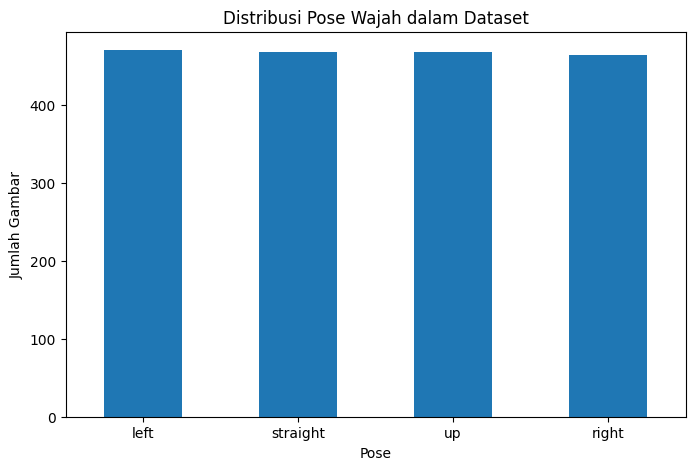

In [4]:
# Hitung jumlah gambar untuk setiap pose
pose_counts = df['pose'].value_counts()
print("Distribusi data berdasarkan pose:")
print(pose_counts)

# Visualisasikan distribusi pose
pose_counts.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Distribusi Pose Wajah dalam Dataset')
plt.ylabel('Jumlah Gambar')
plt.xlabel('Pose')
plt.show()

User ID: sz24
Pose: right
Ekspresi: happy
Mata: open
Ukuran Asli Gambar (Tinggi, Lebar): (60, 64)


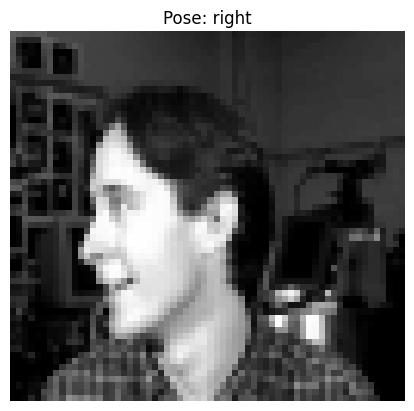

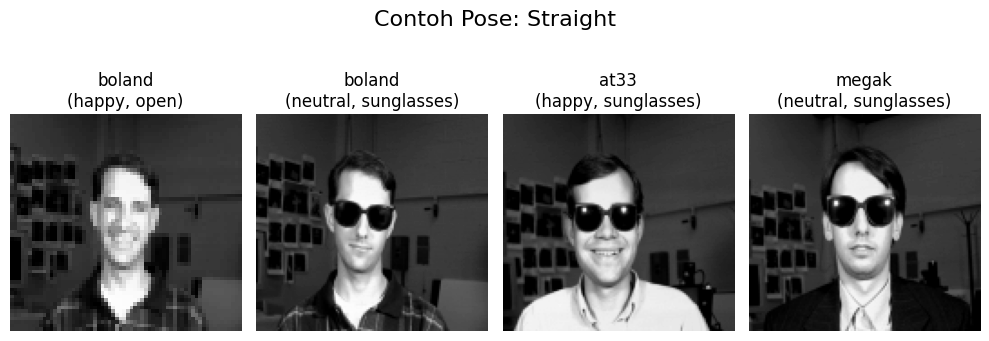

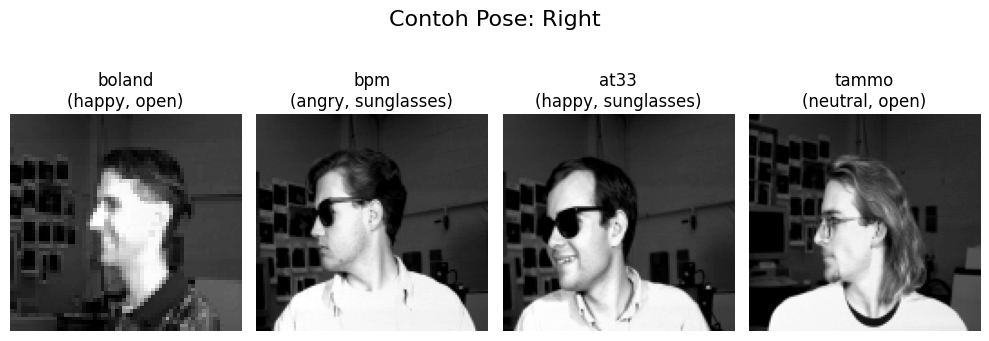

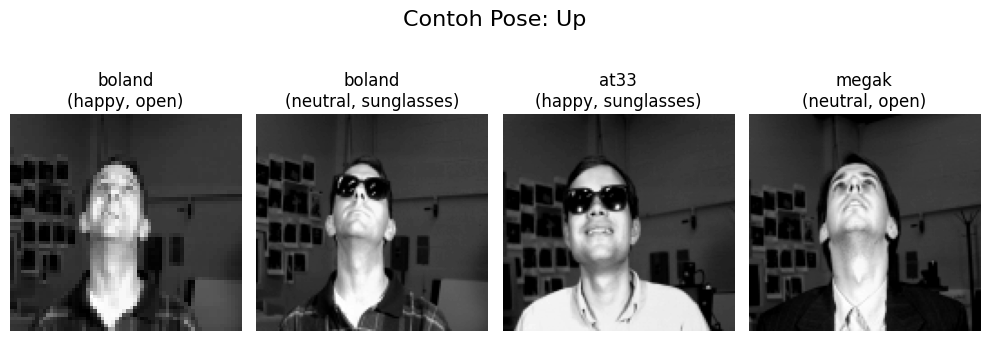

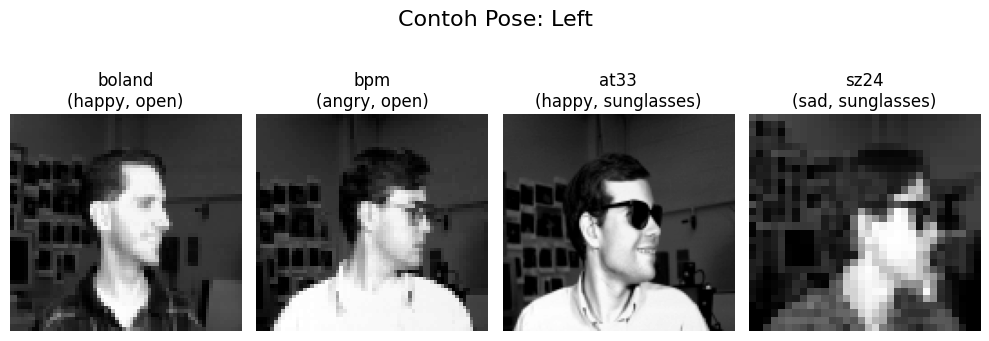

In [5]:
# Ambil satu sampel gambar secara acak (kode asli)
sample = df.sample(1).iloc[0]

# Baca gambar menggunakan OpenCV (kode asli)
image = cv2.imread(sample['path'], cv2.IMREAD_GRAYSCALE)

# Tampilkan informasi dan gambarnya (kode asli)
print(f"User ID: {sample['userid']}")
print(f"Pose: {sample['pose']}")
print(f"Ekspresi: {sample['expression']}")
print(f"Mata: {sample['eyes']}")
print(f"Ukuran Asli Gambar (Tinggi, Lebar): {image.shape}")

plt.imshow(image, cmap='gray')
plt.title(f"Pose: {sample['pose']}")
plt.axis('off') # Menghilangkan sumbu x dan y
plt.show()

# --- PENAMBAHAN: Tampilkan 4 contoh gambar untuk setiap pose ---
poses_to_display = ['straight', 'right', 'up', 'left'] # Urutan pose yang ingin ditampilkan

for pose_label in poses_to_display:
    # Filter DataFrame untuk mendapatkan gambar dengan pose tertentu
    pose_samples = df[df['pose'] == pose_label].sample(4, random_state=42) # Ambil 4 sampel acak untuk konsistensi

    plt.figure(figsize=(10, 4)) # Ukuran figure untuk 4 gambar
    plt.suptitle(f'Contoh Pose: {pose_label.capitalize()}', fontsize=16) # Judul besar untuk grup pose

    for i, (index, row) in enumerate(pose_samples.iterrows()):
        img_path = row['path']
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(1, 4, i + 1) # 1 baris, 4 kolom, gambar ke-(i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{row['userid']}\n({row['expression']}, {row['eyes']})")
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak tumpang tindih
    plt.show()
# --- AKHIR PENAMBAHAN ---

In [6]:
# Tentukan ukuran standar untuk semua gambar
IMG_HEIGHT = 60
IMG_WIDTH = 64
IMG_SIZE = IMG_HEIGHT * IMG_WIDTH # Total piksel per gambar

# List untuk menampung data gambar yang sudah di-flatten
flattened_images = []
# List untuk menampung label pose
labels = []

# Loop melalui setiap baris di DataFrame kita
for index, row in df.iterrows():
    # Baca gambar dalam mode grayscale
    img = cv2.imread(row['path'], cv2.IMREAD_GRAYSCALE)
    
    # Resize gambar ke ukuran standar
    img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    
    # Flatten gambar dari 2D (60x64) menjadi 1D (3840)
    img_flattened = img_resized.flatten()
    
    # Masukkan hasil ke list
    flattened_images.append(img_flattened)
    labels.append(row['pose'])

# Konversi list menjadi NumPy array agar bisa diolah Scikit-learn
X = np.array(flattened_images)
y_text = np.array(labels)

print(f"Bentuk data fitur (X): {X.shape}")
print(f"Bentuk data label (y_text): {y_text.shape}")
print(f"Contoh data fitur baris pertama: {X[0]}")

Bentuk data fitur (X): (1872, 3840)
Bentuk data label (y_text): (1872,)
Contoh data fitur baris pertama: [ 26   1  13 ... 133  95  12]


In [7]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance LabelEncoder
le = LabelEncoder()

# Fit dan transform label teks menjadi angka
y = le.fit_transform(y_text)

# Menampilkan hasil mapping dari angka ke teks
print("Mapping Label (Angka -> Teks):")
for i, label in enumerate(le.classes_):
    print(f"{i} -> {label}")

print(f"\nContoh label setelah encoding: {y[:10]}")

Mapping Label (Angka -> Teks):
0 -> left
1 -> right
2 -> straight
3 -> up

Contoh label setelah encoding: [0 0 0 0 0 0 0 0 0 0]


In [8]:
from sklearn.model_selection import train_test_split

# Membagi data dengan perbandingan 80% train dan 20% test
# stratify=y sangat penting agar proporsi setiap pose di train dan test set sama
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, # random_state agar hasil split selalu sama
    stratify=y
)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (1497, 3840)
Ukuran X_test: (375, 3840)
Ukuran y_train: (1497,)
Ukuran y_test: (375,)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Normalisasi/Scaling data
# Kita ubah skala piksel dari 0-255 menjadi 0-1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# 2. Menerapkan PCA
# Kita set n_components=0.95, artinya PCA akan memilih jumlah komponen
# yang bisa menjelaskan 95% dari varians data. Ini cara yang efisien.
pca = PCA(n_components=0.95)

# Fit PCA HANYA pada data latih
# Lalu transform data latih dan data tes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Dimensi asli setelah scaling: {X_train_scaled.shape[1]}")
print(f"Dimensi setelah reduksi PCA: {pca.n_components_}")
print(f"Bentuk X_train setelah PCA: {X_train_pca.shape}")

Dimensi asli setelah scaling: 3840
Dimensi setelah reduksi PCA: 97
Bentuk X_train setelah PCA: (1497, 97)


In [10]:
from sklearn.svm import SVC

# Membuat instance model SVC
# kernel='rbf' adalah pilihan default yang sangat baik
# C=1.0 adalah parameter regularisasi, kita bisa biarkan default dulu
# gamma='scale' juga pilihan default yang bagus
model = SVC(kernel='rbf', random_state=42, probability=True)

# Melatih model menggunakan data training yang sudah di-PCA
print("Memulai proses training model SVC...")
model.fit(X_train_pca, y_train)
print("Training model selesai!")

Memulai proses training model SVC...
Training model selesai!


In [11]:
# Menggunakan model yang sudah dilatih untuk memprediksi label data tes
print("Membuat prediksi pada data tes...")
y_pred = model.predict(X_test_pca)
print("Prediksi selesai.")

# Kita bisa bandingkan beberapa hasil prediksi dengan label aslinya
print("\nContoh perbandingan hasil:")
print("Prediksi  :", y_pred[:10])
print("Sebenarnya:", y_test[:10])

Membuat prediksi pada data tes...
Prediksi selesai.

Contoh perbandingan hasil:
Prediksi  : [1 0 2 3 2 1 3 0 3 2]
Sebenarnya: [1 0 2 3 2 1 3 0 3 2]


Akurasi Model: 99.20%

Laporan Klasifikasi:
              precision    recall  f1-score   support

        left       0.98      1.00      0.99        94
       right       1.00      1.00      1.00        93
    straight       0.99      1.00      0.99        94
          up       1.00      0.97      0.98        94

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375

Confusion Matrix:


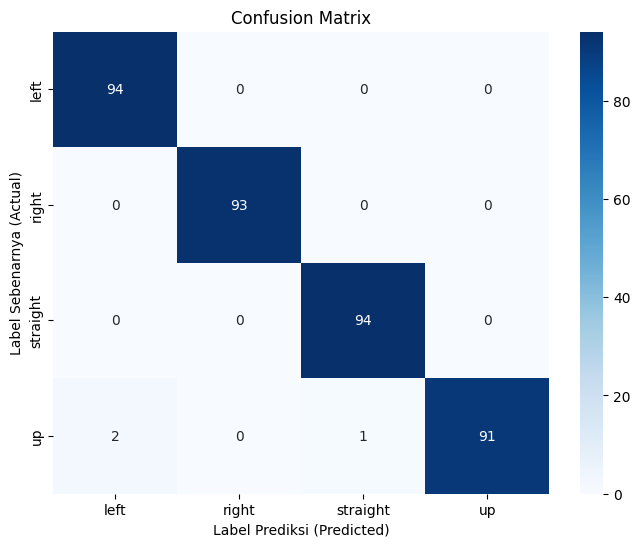

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Menghitung Akurasi
# Akurasi = (Jumlah tebakan benar) / (Total data tes)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%\n")

# 2. Menampilkan Laporan Klasifikasi
# Laporan ini memberikan detail precision, recall, dan f1-score untuk setiap kelas pose
print("Laporan Klasifikasi:")
# Kita gunakan le.classes_ untuk menampilkan nama pose asli (bukan angka)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 3. Membuat Confusion Matrix
# Matrix ini menunjukkan berapa banyak gambar 'left' yang ditebak 'right', dst.
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix agar lebih mudah dibaca
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya (Actual)')
plt.xlabel('Label Prediksi (Predicted)')
plt.show()

In [13]:
import joblib

# Pastikan folder 'models' ada
os.makedirs('../models', exist_ok=True)

# Simpan model SVC
joblib.dump(model, '../models/pose_model.joblib')

# Simpan objek PCA
joblib.dump(pca, '../models/pca_transformer.joblib')

# Simpan objek Label Encoder
joblib.dump(le, '../models/label_encoder.joblib')

print("Model, PCA, dan Label Encoder berhasil disimpan di folder /models!")

Model, PCA, dan Label Encoder berhasil disimpan di folder /models!
